<a href="https://colab.research.google.com/github/seokjinwoo/AIandEcon/blob/main/lec10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기계학습
### 지도학습
#### $y$가 이산인 경우 분류하는 분류모형

- logistic regression
- linear discriminant analysis 선형판별모형

- $\Pr(Y = k | X =x)$ 모형화
- 베이즈 정리를 이용해서 위의 확률을 구한다.
$$
\Pr(Y = k | X =x) = \frac{\pi_k f_k(x)}{\sum_{l}^K \pi_l f_l(x)}
$$

- $f_k(x)$ 평균 $\mu_k$이고, 분산은 $\sigma_k ^2$ 인 정규분포를 따른다.

- 분산 $\sigma_k ^2$ 가 모두 동일하고
- 확률이 높은 범주로 분류를 하게 되면 다음과 같이 판별점수(discriminant score)를 정의할 수 있음

$$
\delta_k (x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + \log(\pi_k)
$$

- $\delta_0 (x) = \delta_1 (x)$ 이렇게 되는 $x$ 값은?
$$
x = \frac{\mu_1 +  \mu_2 }{2}
$$

- $x$가 2 이상인 경우에도 판별점수가 똑같이 $x$들의 선형함수가 됨

$$
\delta_k (x) = c_{k0} + c_{k1} x_1  + c_{k2} x_2 + \cdots  + c_{kp} x_p  
$$


$$
\Pr(Y = k \mid X = x) = \frac{e^{\delta_k(x)}}{\sum_{l=1}^K e^{\delta_l(x)}}
$$

- 위의 함수를 softmax 함수라고 한다. (multinomial logit model)

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Default.csv')
# df.head()



,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


- 분류기 classifier 에 대한 평가

- 맞는 것은 맞고, 틀린 것은 틀리다.
- 맞았는데 틀린다고 하고(false negative), 틀렸는데 맞다고 하는 경우(false positive)

- 분류기의 성능을 측정하는 metric 들이 있음
- accuracy(정확도) = (TP + TN)/ 전체
- precision(정밀도) = TP/(TP + FP)
- recall(재현율) = TP/(TP + FN)

- 더 나아가서 위의 메트릭의 합성을 사용하기도 함: F1-score


In [12]:
# 분류기 LDA 를 이용해서 구축
# sklearn 패키지를 이용 scikit-learn

import pandas as pd
import numpy as np

df = pd.read_csv('/content/Default.csv')
# df.head()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

In [14]:
# 데이터 전처리.
df['default'] = df['default'].map({'No':0, 'Yes':1})

y = df['default']
X = df[['balance']]


In [15]:
# data를 train 데이터와 test 데이터로 나눈다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [19]:
# 모형을 선언을 해야 됨
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)


In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[2882    5]
 [  86   27]]


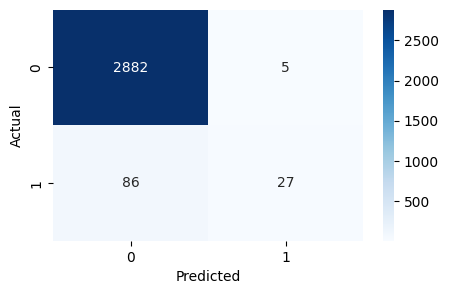

In [24]:
import seaborn as sns

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True,
            cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()



In [26]:
### model performance metrics
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

classification_report = classification_report(y_test, y_pred)
print(classification_report)




Accuracy: 96.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2887
           1       0.84      0.24      0.37       113

    accuracy                           0.97      3000
   macro avg       0.91      0.62      0.68      3000
weighted avg       0.97      0.97      0.96      3000



In [28]:
### mnist 데이터를 이용해서
### 손으로 쓴 숫자 분류기
### 0, 1을 분류하는 분류기
### logistic regression 을 이용한 분류기

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# mnist 데이터
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [ ]:
X, y = mnist.data, mnist.target.astype(int)

z_o_index = np.where((y==0) | (y==1))
X_01 = X[z_o_index]
y_01 = y[z_o_index]

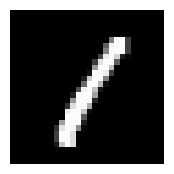

In [36]:
plt.figure(figsize=(3,2))
plt.imshow(X_01[1].reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()




In [61]:
# data split
X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(X_01, y_01,
                                                                test_size=0.2, random_state=0)



In [62]:
lm = LogisticRegression()
lm.fit(X_train_01, y_train_01)

LogisticRegression()

In [63]:
y_pred_01 = lm.predict(X_test_01)

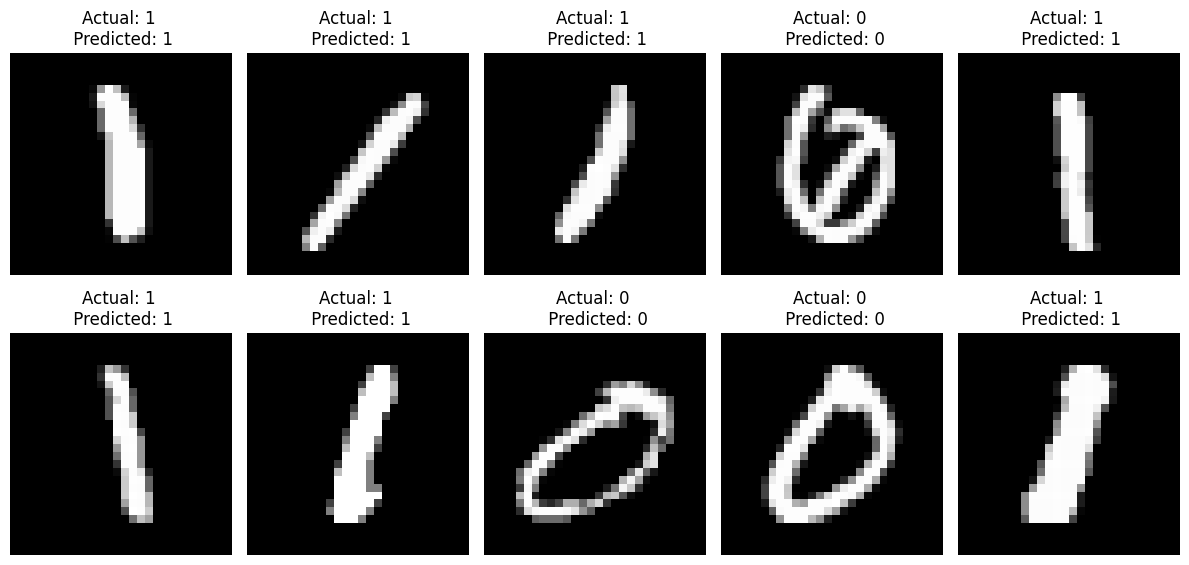

In [64]:
plt.figure(figsize=(12,6))

for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(X_test_01[i].reshape(28,28), cmap='gray')
  plt.title(f"Actual: {y_test_01[i]} \n Predicted: {y_pred_01[i]}")
  plt.axis("off")
plt.tight_layout()
plt.show()



